In [1]:
#Load package
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print(os.listdir())

['.ipynb_checkpoints', 'Challenge.ipynb', 'Data Scientist.ipynb', 'DataScientistProgram.ipynb', 'Deep.ipynb', 'parkinsons.data', 'parkinsons.names', 'pd_speech_features.csv']


In [2]:
df = pd.read_csv('parkinsons.data')
df.head(3)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634


## **A. Description of the data set**

In [3]:

with open('parkinsons.names', 'r') as f:
    data = f.read()
    
print(data)

Title: Parkinsons Disease Data Set

Abstract: Oxford Parkinson's Disease Detection Dataset

-----------------------------------------------------	

Data Set Characteristics: Multivariate
Number of Instances: 197
Area: Life
Attribute Characteristics: Real
Number of Attributes: 23
Date Donated: 2008-06-26
Associated Tasks: Classification
Missing Values? N/A

-----------------------------------------------------	

Source:

The dataset was created by Max Little of the University of Oxford, in 
collaboration with the National Centre for Voice and Speech, Denver, 
Colorado, who recorded the speech signals. The original study published the 
feature extraction methods for general voice disorders.

-----------------------------------------------------

Data Set Information:

This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
rec

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

## **B. Exploratory Data Analysis**

#### ***Health status of the subject***

Healthy : 48 Proportion: 24.62 %
Sick: 147 Proportion: 75.38 %


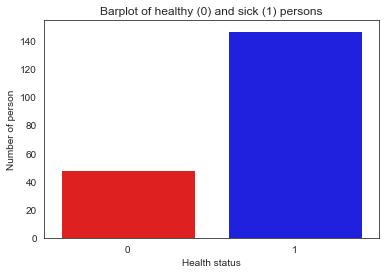

In [5]:
###Plotting number of healthy (0) and sick (1) persons
sns.set_style("white")
sns.countplot(df['status'], palette=["red", "blue"]).set(title = "Barplot of healthy (0) and sick (1) persons", 
                                                             xlabel = 'Health status', ylabel ='Number of person')
#plt.xlabel('Health status')
#plt.ylabel('Number of person')
###Print
h = df[df['status']==0]['status'].count()
s = df[df['status']==1]['status'].count()

print('Healthy :',h ,'Proportion:', round((h*100/(h+s)),2),"%")
print('Sick:',s,'Proportion:' ,round((s*100/(h+s)), 2),"%" )
plt.show()

[Text(0.5,1,'Maximum vocal fundamental frequency')]

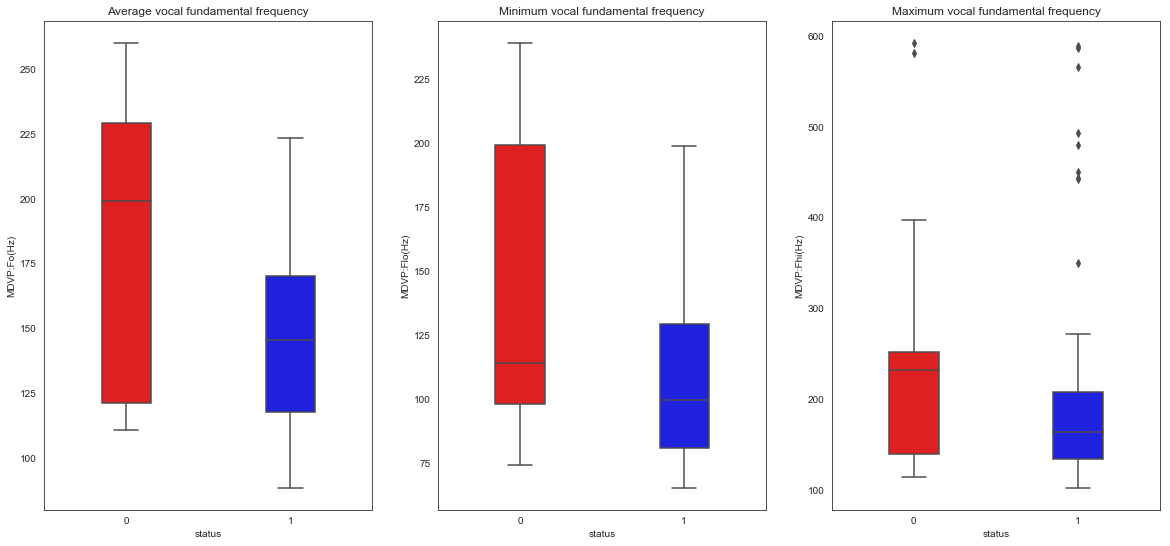

In [6]:
##set plot parameters
fig, ax = plt.subplots(1,3,figsize=(20,9))

##Boxplot for the average vocal fundamental frequency
sns.boxplot(x='status',y='MDVP:Fo(Hz)', data=df, width=0.3,
                palette=["red", "blue"], ax=ax[0]).set(title = 'Average vocal fundamental frequency')

##Boxplot for the minimum vocal fundamental frequency
sns.boxplot(x='status',y='MDVP:Flo(Hz)', data=df, width=0.3,
                palette=["red", "blue"], ax=ax[1]).set(title = "Minimum vocal fundamental frequency")

##Boxplot for the maximum vocal fundamental frequency
sns.boxplot(x='status',y='MDVP:Fhi(Hz)', data=df, width=0.3,
                palette=["red", "blue"], ax=ax[2]).set(title = "Maximum vocal fundamental frequency")
plt.show()

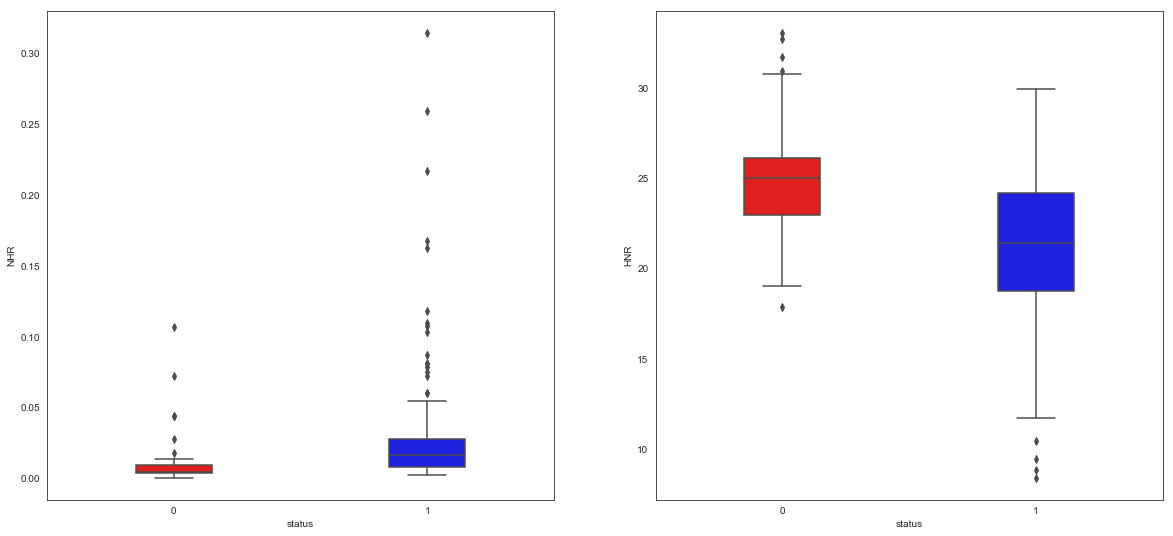

In [7]:
fig, axs = plt.subplots(ncols = 2, figsize = (20,9))
col_names = ["NHR","HNR"]
for i in range(0, len(col_names)):
    sns.boxplot(x='status', y=col_names[i], data=df, width=0.3, palette=["red", "blue"], ax = axs[i])
plt.show()

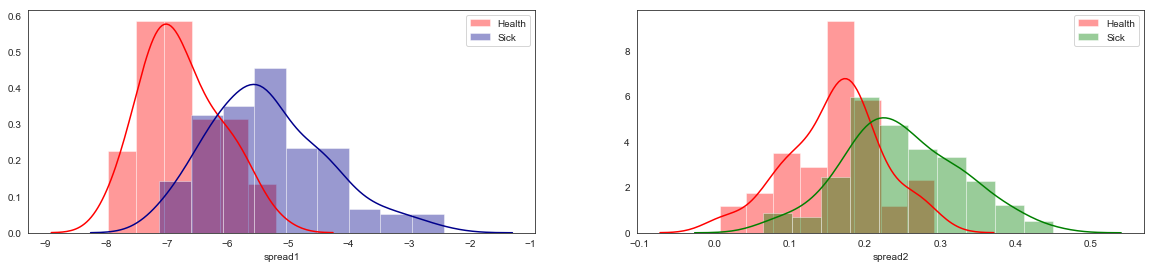

In [10]:
plt.figure(figsize=(20,9))

plt.subplot(2,2,1)
sns.distplot(df[df['status']==0]['spread1'], label="Health",color='red')
sns.distplot(df[df['status']==1]['spread1'], label="Sick", color='darkblue')
plt.legend()
plt.subplot(2,2,2)
sns.distplot(df[df['status']==0]['spread2'], label="Health", color='red')
sns.distplot(df[df['status']==1]['spread2'], label="Sick", color='green')
plt.legend()
plt.show()

#### ***Correlation between parameters***

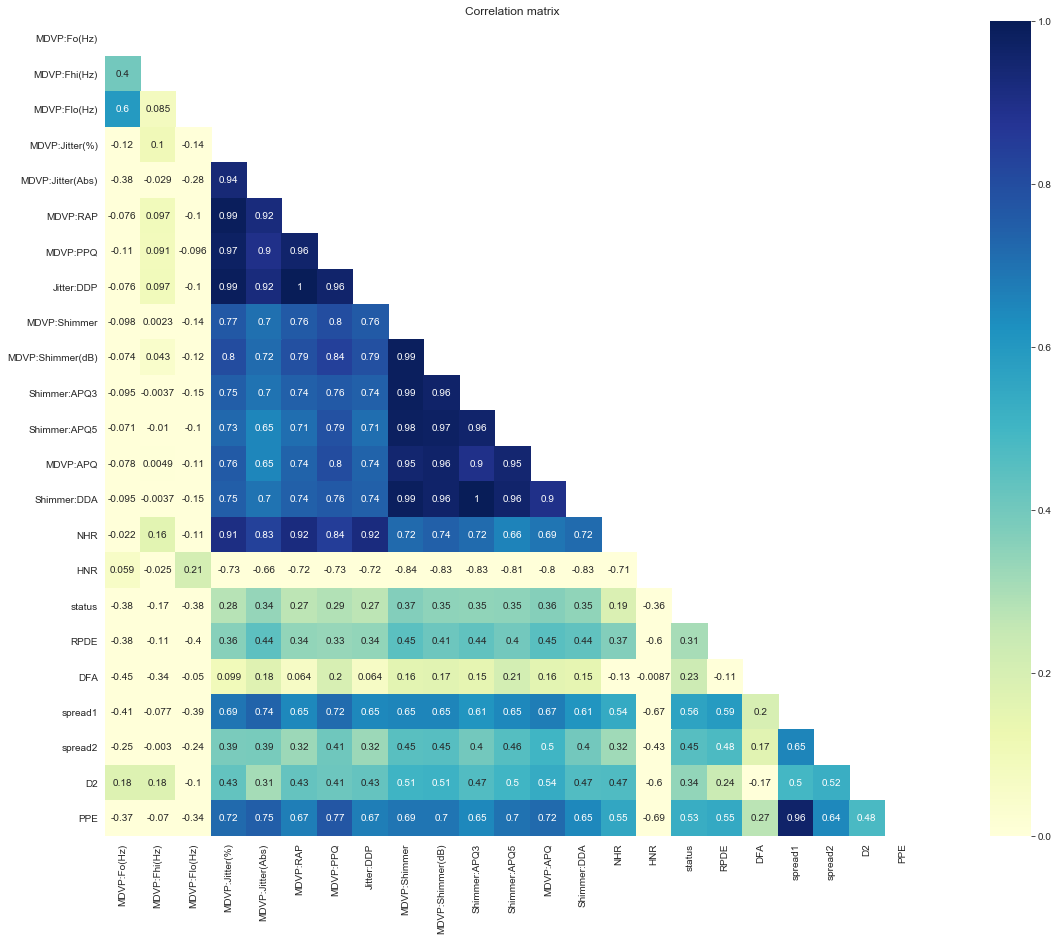

In [12]:
correlation = df.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25, 15))
    ax = sns.heatmap(correlation, cmap="YlGnBu", annot = True,
            mask=mask, square=True, vmin=0, vmax=1).set(title = 'Correlation matrix')

## **C. Model Building**

In [24]:
#Load packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score


In [14]:
#Data preprocessing
df = df.dropna()
X = df.drop(['name', 'status'],axis=1)
y = df["status"].astype("bool")
print(X.shape)
print(y.shape)

#Rescaling and transforming data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Data splitting and selection
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size = 0.3, random_state = 150)

(195, 22)
(195,)


In [16]:
##RandoForestClassification Model
model = RandomForestClassifier(n_jobs=-1)
parameters={'max_depth':[1,2,3,4,5,10],
           'n_estimators':[1,2,3,4,5,10],
              'max_features':[1,2,3,4,5,10],
               'criterion':['gini'],
               'bootstrap':[True],
               'min_samples_leaf':[1,2,3,4] 
             }





In [17]:
mod_forest = GridSearchCV(estimator=model,param_grid=parameters, cv=5)

In [18]:
mod_forest.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              random_

In [19]:
print(mod_forest.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 1, 'n_estimators': 5}


In [31]:
##Add best parameters of RandomForest 
##Test others models: Xgboost, KNN, Naive bayes, Decision Tree

ESTIMATORS = {"RandomForestClassifier": RandomForestClassifier(bootstrap=True, criterion='gini', 
                                     max_depth=10, max_features=10, 
                                     min_samples_leaf=1, n_estimators=4),
    "XgbClassifier": xgb.XGBClassifier(max_depth = 3, 
                                       n_estimators = 10, objective = 'binary:logistic'),
    "K-nn": KNeighborsClassifier(n_neighbors=3),
    "Naive-bayes": GaussianNB(),                     
    "DecisionTreeClassifier": DecisionTreeClassifier(criterion='entropy', random_state=10, max_depth=6)
}


y_test_predict = dict()
accur = dict()
f_score = dict()

for name, estimator in ESTIMATORS.items():     
    estimator.fit(X_train, y_train)                  
    y_test_predict[name] = estimator.predict(X_test)   
    accur[name] = accuracy_score(y_test, estimator.predict(X_test))
    print("Accuracy of ",name," ", round(accur[name]*100,2),"%")
    f_score[name] = f1_score(y_test, estimator.predict(X_test))
    print("f1_score ",name," ", round(f_score[name]*100,2),"%")
    

Accuracy of  RandomForestClassifier   89.83 %
f1_score  RandomForestClassifier   93.88 %
Accuracy of  XgbClassifier   94.92 %
f1_score  XgbClassifier   96.97 %
Accuracy of  K-nn   94.92 %
f1_score  K-nn   97.03 %
Accuracy of  Naive-bayes   67.8 %
f1_score  Naive-bayes   77.65 %
Accuracy of  DecisionTreeClassifier   86.44 %
f1_score  DecisionTreeClassifier   91.67 %


## ***Model choice***


##### As KNN and Xgboost model accuracy are equal, the choice is base on their F1 score. 
##### For this study, model with KNN present most accuracy and F1_score.